# Stock_Market_Prediction
* Textual analysis :
Applying the NLP processing and the Sentiment analysis to the textual dataset(news headlines)
* Numericel analysis :
Applying the numerical analysis to the historical stock prices dataset
* merging the two datasets :
 Create a hybrid model for stock price/performance prediction  using deep learning 
 LSTM for time series forcasting 
 with the avoidance of overfitting


In [171]:
# install nltk library if didn't previously. follow the code from this cell for texual analysis
# !pip install nltk
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

1  Importing ibraries

In [172]:
# Importing ibraries

# to get rid of the warnings
import warnings
warnings.filterwarnings('ignore')

import math             # to apply mathematical operations
import pandas as pd     # to analyze and manipulation of data
import numpy as np      # for array operations
import datetime as dt   # for maintaining date type values

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for bulding deep learning model
import tensorflow as tf
#from tensorflow import keras


#from keras.models import Sequential
#from keras.layers import Dense, LSTM, Dropout, Dense, Activation
import nltk
# for analyzing textual data
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# for preprocessing data and evaluating the model 
from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

1.2 Importing Data from Drive

In [173]:
#reading the datas from drive
price_data = pd.read_csv('../input/india-headlines-news-dataset/india-news-headlines.csv')
stock_news = pd.read_csv('../input/tcsns-stockcsv/TCS.NS_Stock.csv')

In [174]:
# displaying stock price dataset
price_data.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [175]:
# displaying stock news headlines dataset
stock_news.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0
1,02-01-2003,61.525002,62.924999,57.912498,58.299999,43.443855,5325328.0
2,03-01-2003,60.000000,61.049999,58.500000,59.012501,43.974789,4198040.0
3,06-01-2003,59.924999,60.187500,56.875000,57.262501,42.670746,4121520.0
4,07-01-2003,58.000000,58.500000,56.062500,56.599998,42.177040,2650800.0


##2 Feature Engineering

In [176]:
# checking the size of the dataset
len(price_data), len(stock_news)

(3650970, 4476)

In [177]:
# checking the NULL values in both dataset
price_data.isnull().sum(), stock_news.isnull().sum()

(publish_date         0
 headline_category    0
 headline_text        0
 dtype: int64,
 Date          0
 Open         16
 High         16
 Low          16
 Close        16
 Adj Close    16
 Volume       16
 dtype: int64)

2.1 Price Data

In [178]:
# displaying dataset for view to manipulate
price_data.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [179]:
price_data.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

In [180]:
# droping the duplicate values of dataset
price_data = price_data.drop_duplicates()

price_data['publish_date'] = pd.to_datetime(price_data['publish_date'],format='%Y%m%d')
price_data = price_data.rename(columns={'publish_date':'Date'})


In [181]:
stock_news['Date'] = pd.to_datetime(stock_news['Date'],format='%d-%m-%Y')
stock_news.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-01,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0
1,2003-01-02,61.525002,62.924999,57.912498,58.299999,43.443855,5325328.0
2,2003-01-03,60.000000,61.049999,58.500000,59.012501,43.974789,4198040.0
3,2003-01-06,59.924999,60.187500,56.875000,57.262501,42.670746,4121520.0
4,2003-01-07,58.000000,58.500000,56.062500,56.599998,42.177040,2650800.0


2.2 Stock datas news headlines

In [182]:
stock_news.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-01,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0
1,2003-01-02,61.525002,62.924999,57.912498,58.299999,43.443855,5325328.0
2,2003-01-03,60.000000,61.049999,58.500000,59.012501,43.974789,4198040.0
3,2003-01-06,59.924999,60.187500,56.875000,57.262501,42.670746,4121520.0
4,2003-01-07,58.000000,58.500000,56.062500,56.599998,42.177040,2650800.0


In [183]:
price_data.head()

,Date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


# merging the datasets

In [184]:
stock_data = pd.merge(price_data,stock_news,on='Date',how='right')
stock_data.head()


,Date,headline_category,headline_text,Open,High,Low,Close,Adj Close,Volume
0,2003-01-01,city.bengaluru,Chastened BCC members decide to mend ways,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0
1,2003-01-01,city.bengaluru,New look for slums; govt to start work,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0
2,2003-01-01,city.bengaluru,Global spiritual meet to begin from Jan. 16,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0
3,2003-01-01,city.bengaluru,Parameshwara allays fears of scrapping CET,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0
4,2003-01-01,city.bengaluru,Amusement park opens today,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0


In [185]:
stock_data = stock_data.drop('Adj Close',axis=1)

In [186]:
stock_data = stock_data.drop_duplicates(keep='first')

In [187]:
# checking for NULL values 
stock_data.isnull().sum()

Date                    0
headline_category       0
headline_text           0
Open                 7750
High                 7750
Low                  7750
Close                7750
Volume               7750
dtype: int64

In [188]:
stock_data=stock_data.dropna()

In [189]:
stock_data.reset_index(drop=True)

,Date,headline_category,headline_text,Open,High,Low,Close,Volume
0,2003-01-01,city.bengaluru,Chastened BCC members decide to mend ways,59.987499,61.974998,59.987499,61.087502,6027072.0
1,2003-01-01,city.bengaluru,New look for slums; govt to start work,59.987499,61.974998,59.987499,61.087502,6027072.0
2,2003-01-01,city.bengaluru,Global spiritual meet to begin from Jan. 16,59.987499,61.974998,59.987499,61.087502,6027072.0
3,2003-01-01,city.bengaluru,Parameshwara allays fears of scrapping CET,59.987499,61.974998,59.987499,61.087502,6027072.0
4,2003-01-01,city.bengaluru,Amusement park opens today,59.987499,61.974998,59.987499,61.087502,6027072.0
...,...,...,...,...,...,...,...,...
2207053,2020-12-30,city.nagpur,Robot-assisted knee replacement is precise; pe...,2934.399902,2947.699951,2902.000000,2909.300049,2637968.0
2207054,2020-12-30,city.nagpur,Flourishing youth: Nirman develops unique asse...,2934.399902,2947.699951,2902.000000,2909.300049,2637968.0
2207055,2020-12-30,city.nagpur,MERC's new supply code is anti-consumer: Hogade,2934.399902,2947.699951,2902.000000,2909.300049,2637968.0
2207056,2020-12-30,city.nagpur,66th ABVP national meet witnesses participatio...,2934.399902,2947.699951,2902.000000,2909.300049,2637968.0


In [190]:
stock_data.shape

(2207058, 8)

In [191]:
stock_data.isnull().sum()

Date                 0
headline_category    0
headline_text        0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
dtype: int64

In [192]:
# again visualize according to NULL values for understanding
# ax = sns.heatmap(stock_data.isnull())
# stock_data

In [193]:
stock_data.shape

(2207058, 8)

In [194]:
stock_data = stock_data[stock_data['Date'] >= '2019-01-15']
stock_data = stock_data[stock_data['Date'] <= '2019-06-15' ]
stock_data.shape

(49813, 8)

In [195]:
# droping the null values
stock_data.dropna(axis = 0, inplace = True)
stock_data.head()

,Date,headline_category,headline_text,Open,High,Low,Close,Volume
1974450,2019-01-15,life-style.events,Happy Pongal 2019: Images; Cards; Greetings; W...,1810.0,1869.349976,1808.0,1867.800049,7711653.0
1974451,2019-01-15,life-style.spotlight,City colleges find space to grow veggies; fruits,1810.0,1869.349976,1808.0,1867.800049,7711653.0
1974452,2019-01-15,tv.news.kannada,Being myself was what helped me tick in the Bi...,1810.0,1869.349976,1808.0,1867.800049,7711653.0
1974453,2019-01-15,tv.news.kannada,TV schedules are too hectic. With films; I now...,1810.0,1869.349976,1808.0,1867.800049,7711653.0
1974454,2019-01-15,city.bengaluru,City colleges find space to grow veggies; fruits,1810.0,1869.349976,1808.0,1867.800049,7711653.0


In [196]:
#Converting every word to lower case
stock_data['headline_text'] = stock_data['headline_text'].apply(lambda x : ' '.join(x.lower() for x in x.split()))
stock_data['headline_text']

1974450    happy pongal 2019: images; cards; greetings; w...
1974451     city colleges find space to grow veggies; fruits
1974452    being myself was what helped me tick in the bi...
1974453    tv schedules are too hectic. with films; i now...
1974454     city colleges find space to grow veggies; fruits
                                 ...                        
2024258                   low on fuel; sos from pilot to atc
2024259                  theft attempt at salt lake aa block
2024260    maharera 'fails' to meet buyers' great expecta...
2024261                            festival traces the roots
2024262                            festival traces the roots
Name: headline_text, Length: 49813, dtype: object

In [197]:
#Removing punctuations
stock_data['headline_text'] = stock_data['headline_text'].str.replace('[^\w\s]','')
stock_data['headline_text']

1974450    happy pongal 2019 images cards greetings wishe...
1974451      city colleges find space to grow veggies fruits
1974452    being myself was what helped me tick in the bi...
1974453    tv schedules are too hectic with films i now h...
1974454      city colleges find space to grow veggies fruits
                                 ...                        
2024258                    low on fuel sos from pilot to atc
2024259                  theft attempt at salt lake aa block
2024260     maharera fails to meet buyers great expectations
2024261                            festival traces the roots
2024262                            festival traces the roots
Name: headline_text, Length: 49813, dtype: object

In [198]:
#Removing stopwords
sw = stopwords.words('english')
stock_data['headline_text'] = stock_data['headline_text'].apply(lambda x : ' '.join(x for x in x.split() if x not in sw))
stock_data['headline_text']

1974450    happy pongal 2019 images cards greetings wishe...
1974451         city colleges find space grow veggies fruits
1974452          helped tick bigg boss house thus far murali
1974453    tv schedules hectic films hope find time road ...
1974454         city colleges find space grow veggies fruits
                                 ...                        
2024258                               low fuel sos pilot atc
2024259                     theft attempt salt lake aa block
2024260        maharera fails meet buyers great expectations
2024261                                festival traces roots
2024262                                festival traces roots
Name: headline_text, Length: 49813, dtype: object

In [199]:
#Number of words in each headline text
stock_data['word_count'] = stock_data['headline_text'].apply(lambda x : len(str(x).split(' ')))
stock_data.head()

,Date,headline_category,headline_text,Open,High,Low,Close,Volume,word_count
1974450,2019-01-15,life-style.events,happy pongal 2019 images cards greetings wishe...,1810.0,1869.349976,1808.0,1867.800049,7711653.0,11
1974451,2019-01-15,life-style.spotlight,city colleges find space grow veggies fruits,1810.0,1869.349976,1808.0,1867.800049,7711653.0,7
1974452,2019-01-15,tv.news.kannada,helped tick bigg boss house thus far murali,1810.0,1869.349976,1808.0,1867.800049,7711653.0,8
1974453,2019-01-15,tv.news.kannada,tv schedules hectic films hope find time road ...,1810.0,1869.349976,1808.0,1867.800049,7711653.0,11
1974454,2019-01-15,city.bengaluru,city colleges find space grow veggies fruits,1810.0,1869.349976,1808.0,1867.800049,7711653.0,7


In [200]:
#Number of characters in each headline text
stock_data['char_count'] = stock_data['headline_text'].str.len()
stock_data.head()

,Date,headline_category,headline_text,Open,High,Low,Close,Volume,word_count,char_count
1974450,2019-01-15,life-style.events,happy pongal 2019 images cards greetings wishe...,1810.0,1869.349976,1808.0,1867.800049,7711653.0,11,79
1974451,2019-01-15,life-style.spotlight,city colleges find space grow veggies fruits,1810.0,1869.349976,1808.0,1867.800049,7711653.0,7,44
1974452,2019-01-15,tv.news.kannada,helped tick bigg boss house thus far murali,1810.0,1869.349976,1808.0,1867.800049,7711653.0,8,43
1974453,2019-01-15,tv.news.kannada,tv schedules hectic films hope find time road ...,1810.0,1869.349976,1808.0,1867.800049,7711653.0,11,65
1974454,2019-01-15,city.bengaluru,city colleges find space grow veggies fruits,1810.0,1869.349976,1808.0,1867.800049,7711653.0,7,44


In [201]:
#Counting commun words
freq_comm = pd.Series(' '.join(stock_data['headline_text']).split()).value_counts()[:10]
freq_comm

rs          1791
delhi       1431
bjp         1355
held        1262
man         1261
says        1133
congress    1114
may         1001
two          990
road         981
dtype: int64

In [202]:
#Removing commun words
freq = list(freq_comm.index)
stock_data['headline_text'] = stock_data['headline_text'].apply(lambda x : ' '.join(x for x in x.split() if x not in freq))
stock_data['headline_text']

1974450    happy pongal 2019 images cards greetings wishe...
1974451         city colleges find space grow veggies fruits
1974452          helped tick bigg boss house thus far murali
1974453    tv schedules hectic films hope find time trips...
1974454         city colleges find space grow veggies fruits
                                 ...                        
2024258                               low fuel sos pilot atc
2024259                     theft attempt salt lake aa block
2024260        maharera fails meet buyers great expectations
2024261                                festival traces roots
2024262                                festival traces roots
Name: headline_text, Length: 49813, dtype: object

In [203]:
#Counting rare words
freq_rare = pd.Series(' '.join(stock_data['headline_text']).split()).value_counts()[-50:]
freq_rare.head()

dubbed        1
kanyaathon    1
masses        1
teresa        1
naregaon      1
dtype: int64

In [204]:
#Removing rare words
freq = list(freq_rare.index)
stock_data['headline_text'] = stock_data['headline_text'].apply(lambda x : ' '.join(x for x in x.split() if x not in freq_rare))
stock_data['headline_text']

1974450    happy pongal 2019 images cards greetings wishe...
1974451         city colleges find space grow veggies fruits
1974452          helped tick bigg boss house thus far murali
1974453    tv schedules hectic films hope find time trips...
1974454         city colleges find space grow veggies fruits
                                 ...                        
2024258                               low fuel sos pilot atc
2024259                     theft attempt salt lake aa block
2024260        maharera fails meet buyers great expectations
2024261                                festival traces roots
2024262                                festival traces roots
Name: headline_text, Length: 49813, dtype: object

In [205]:
#Tokenization
TextBlob(str(stock_data['headline_text'])).words

WordList(['1974450', 'happy', 'pongal', '2019', 'images', 'cards', 'greetings', 'wishe', '1974451', 'city', 'colleges', 'find', 'space', 'grow', 'veggies', 'fruits', '1974452', 'helped', 'tick', 'bigg', 'boss', 'house', 'thus', 'far', 'murali', '1974453', 'tv', 'schedules', 'hectic', 'films', 'hope', 'find', 'time', 'trips', '1974454', 'city', 'colleges', 'find', 'space', 'grow', 'veggies', 'fruits', '2024258', 'low', 'fuel', 'sos', 'pilot', 'atc', '2024259', 'theft', 'attempt', 'salt', 'lake', 'aa', 'block', '2024260', 'maharera', 'fails', 'meet', 'buyers', 'great', 'expectations', '2024261', 'festival', 'traces', 'roots', '2024262', 'festival', 'traces', 'roots', 'Name', 'headline_text', 'Length', '49813', 'dtype', 'object'])

In [206]:
#Stemming
ps = PorterStemmer()
stock_data['headline_text'].apply(lambda x : ' '.join(ps.stem(word) for word in x.split()))

1974450    happi pongal 2019 imag card greet wish quot pi...
1974451              citi colleg find space grow veggi fruit
1974452              help tick bigg boss hous thu far murali
1974453    tv schedul hectic film hope find time trip shr...
1974454              citi colleg find space grow veggi fruit
                                 ...                        
2024258                                low fuel so pilot atc
2024259                     theft attempt salt lake aa block
2024260                maharera fail meet buyer great expect
2024261                                    festiv trace root
2024262                                    festiv trace root
Name: headline_text, Length: 49813, dtype: object

# Performing sentiment analysis for each headline text

In [207]:
stock_data['sentiment'] = stock_data['headline_text'].apply(lambda x : TextBlob(x).sentiment[0])

In [208]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [209]:
#Adding subjectivity and polarity columns
stock_data['Subjectivity'] = stock_data['headline_text'].apply(getSubjectivity)
stock_data['Polarity'] = stock_data['headline_text'].apply(getPolarity)
stock_data.head()

,Date,headline_category,headline_text,Open,High,Low,Close,Volume,word_count,char_count,sentiment,Subjectivity,Polarity
1974450,2019-01-15,life-style.events,happy pongal 2019 images cards greetings wishe...,1810.0,1869.349976,1808.0,1867.800049,7711653.0,11,79,0.8,1.0,0.8
1974451,2019-01-15,life-style.spotlight,city colleges find space grow veggies fruits,1810.0,1869.349976,1808.0,1867.800049,7711653.0,7,44,0.0,0.0,0.0
1974452,2019-01-15,tv.news.kannada,helped tick bigg boss house thus far murali,1810.0,1869.349976,1808.0,1867.800049,7711653.0,8,43,0.1,1.0,0.1
1974453,2019-01-15,tv.news.kannada,tv schedules hectic films hope find time trips...,1810.0,1869.349976,1808.0,1867.800049,7711653.0,11,65,0.0,0.0,0.0
1974454,2019-01-15,city.bengaluru,city colleges find space grow veggies fruits,1810.0,1869.349976,1808.0,1867.800049,7711653.0,7,44,0.0,0.0,0.0


<AxesSubplot:>

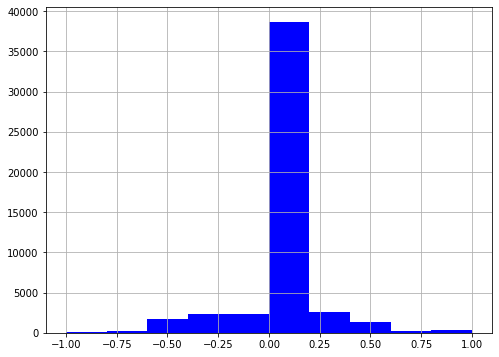

In [210]:
plt.figure(figsize = (8,6))
stock_data['Polarity'].hist(color = 'blue')

<AxesSubplot:>

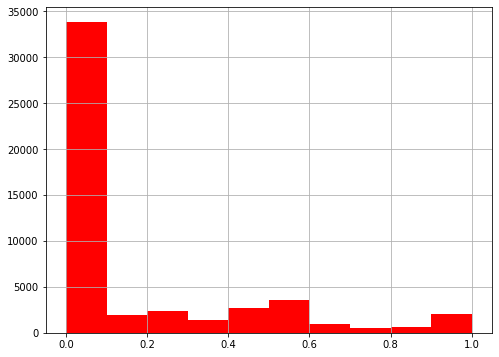

In [211]:
plt.figure(figsize = (8,6))
stock_data['Subjectivity'].hist(color = 'red')

In [212]:
sia = SentimentIntensityAnalyzer()

stock_data['Compound'] = [sia.polarity_scores(v)['compound'] for v in stock_data['headline_text']]
stock_data['Negative'] = [sia.polarity_scores(v)['neg'] for v in stock_data['headline_text']]
stock_data['Neutral'] = [sia.polarity_scores(v)['neu'] for v in stock_data['headline_text']]
stock_data['Positive'] = [sia.polarity_scores(v)['pos'] for v in stock_data['headline_text']]
stock_data

,Date,headline_category,headline_text,Open,High,Low,Close,Volume,word_count,char_count,sentiment,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1974450,2019-01-15,life-style.events,happy pongal 2019 images cards greetings wishe...,1810.00,1869.349976,1808.0,1867.800049,7711653.0,11,79,0.80,1.000,0.80,0.7964,0.000,0.497,0.503
1974451,2019-01-15,life-style.spotlight,city colleges find space grow veggies fruits,1810.00,1869.349976,1808.0,1867.800049,7711653.0,7,44,0.00,0.000,0.00,0.0000,0.000,1.000,0.000
1974452,2019-01-15,tv.news.kannada,helped tick bigg boss house thus far murali,1810.00,1869.349976,1808.0,1867.800049,7711653.0,8,43,0.10,1.000,0.10,0.0000,0.000,1.000,0.000
1974453,2019-01-15,tv.news.kannada,tv schedules hectic films hope find time trips...,1810.00,1869.349976,1808.0,1867.800049,7711653.0,11,65,0.00,0.000,0.00,0.4404,0.000,0.756,0.244
1974454,2019-01-15,city.bengaluru,city colleges find space grow veggies fruits,1810.00,1869.349976,1808.0,1867.800049,7711653.0,7,44,0.00,0.000,0.00,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024258,2019-06-14,city.kolkata,low fuel sos pilot atc,2257.25,2263.100098,2234.0,2254.500000,2131408.0,5,22,0.00,0.300,0.00,-0.2732,0.344,0.656,0.000
2024259,2019-06-14,city.kolkata,theft attempt salt lake aa block,2257.25,2263.100098,2234.0,2254.500000,2131408.0,6,32,0.00,0.000,0.00,-0.4404,0.367,0.633,0.000
2024260,2019-06-14,city.pune,maharera fails meet buyers great expectations,2257.25,2263.100098,2234.0,2254.500000,2131408.0,6,45,0.15,0.525,0.15,0.3182,0.257,0.367,0.376
2024261,2019-06-14,entertainment.events.goa,festival traces roots,2257.25,2263.100098,2234.0,2254.500000,2131408.0,3,21,0.00,0.000,0.00,0.4939,0.000,0.385,0.615


In [213]:
#Creating price_up column where 1 represents increase in stock and 0 represents decrease or remain unchanged
# stock_data['price_up'] = np.where(stock_data['Close'].shift(-1)>stock_data['Close'],1,0)

In [214]:
# drop the 'headline_text' column which sentiment score has been generated
stock_data.drop(['headline_text'],axis=1,inplace=True)

In [215]:
stock_data.drop(['headline_category'],axis=1,inplace=True)

In [216]:
stock_data.head()

,Date,Open,High,Low,Close,Volume,word_count,char_count,sentiment,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1974450,2019-01-15,1810.0,1869.349976,1808.0,1867.800049,7711653.0,11,79,0.8,1.0,0.8,0.7964,0.0,0.497,0.503
1974451,2019-01-15,1810.0,1869.349976,1808.0,1867.800049,7711653.0,7,44,0.0,0.0,0.0,0.0000,0.0,1.000,0.000
1974452,2019-01-15,1810.0,1869.349976,1808.0,1867.800049,7711653.0,8,43,0.1,1.0,0.1,0.0000,0.0,1.000,0.000
1974453,2019-01-15,1810.0,1869.349976,1808.0,1867.800049,7711653.0,11,65,0.0,0.0,0.0,0.4404,0.0,0.756,0.244
1974454,2019-01-15,1810.0,1869.349976,1808.0,1867.800049,7711653.0,7,44,0.0,0.0,0.0,0.0000,0.0,1.000,0.000


In [217]:
# writing the prepared data to drive to avoid the procedure done before
stock_data.to_csv('microsoft_stock_data.csv')

# 4 Reading 'microsoft_stock_data' Feature Engineering on stock_data

In [218]:
# reading the 'tesla_stock_data' into pandas dataframe from drive
stock_data = pd.read_csv('microsoft_stock_data.csv', index_col = False)
stock_data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,word_count,char_count,sentiment,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,1974450,2019-01-15,1810.0,1869.349976,1808.0,1867.800049,7711653.0,11,79,0.8,1.0,0.8,0.7964,0.0,0.497,0.503
1,1974451,2019-01-15,1810.0,1869.349976,1808.0,1867.800049,7711653.0,7,44,0.0,0.0,0.0,0.0000,0.0,1.000,0.000
2,1974452,2019-01-15,1810.0,1869.349976,1808.0,1867.800049,7711653.0,8,43,0.1,1.0,0.1,0.0000,0.0,1.000,0.000
3,1974453,2019-01-15,1810.0,1869.349976,1808.0,1867.800049,7711653.0,11,65,0.0,0.0,0.0,0.4404,0.0,0.756,0.244
4,1974454,2019-01-15,1810.0,1869.349976,1808.0,1867.800049,7711653.0,7,44,0.0,0.0,0.0,0.0000,0.0,1.000,0.000


In [219]:
# reading the 'tesla_stock_data' into pandas dataframe from drive
stock_data = pd.read_csv('microsoft_stock_data.csv', index_col = False)

# # naming the index column
# stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

stock_data.drop(['Unnamed: 0'],axis=1,inplace=True)
# setting the 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data.head()

,Open,High,Low,Close,Volume,word_count,char_count,sentiment,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
Date,,,,,,,,,,,,,,
2019-01-15,1810.0,1869.349976,1808.0,1867.800049,7711653.0,11,79,0.8,1.0,0.8,0.7964,0.0,0.497,0.503
2019-01-15,1810.0,1869.349976,1808.0,1867.800049,7711653.0,7,44,0.0,0.0,0.0,0.0000,0.0,1.000,0.000
2019-01-15,1810.0,1869.349976,1808.0,1867.800049,7711653.0,8,43,0.1,1.0,0.1,0.0000,0.0,1.000,0.000
2019-01-15,1810.0,1869.349976,1808.0,1867.800049,7711653.0,11,65,0.0,0.0,0.0,0.4404,0.0,0.756,0.244
2019-01-15,1810.0,1869.349976,1808.0,1867.800049,7711653.0,7,44,0.0,0.0,0.0,0.0000,0.0,1.000,0.000


In [220]:
# checking the shape (i.e. number rows and columns) of the dataset
stock_data.shape

(49813, 14)

In [221]:
# generating basic statistical values for understanding
stock_data.describe(include='all')

,Open,High,Low,Close,Volume,word_count,char_count,sentiment,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
count,49813.000000,49813.000000,49813.000000,49813.000000,4.981300e+04,49813.000000,49813.000000,49813.000000,49813.00000,49813.000000,49813.000000,49813.000000,49813.000000,49813.000000
mean,2060.020757,2080.915506,2036.682802,2060.462482,3.015073e+06,6.941501,45.788529,0.012956,0.15807,0.012956,-0.073936,0.143824,0.773385,0.082712
std,98.864811,99.553469,96.974917,98.850389,1.394205e+06,2.230610,14.382809,0.192724,0.27064,0.192724,0.352755,0.213995,0.237421,0.155968
min,1810.000000,1869.349976,1808.000000,1867.800049,1.111404e+06,1.000000,0.000000,-1.000000,0.00000,-1.000000,-0.960700,0.000000,0.000000,0.000000
25%,2004.949951,2015.900024,1978.599976,1999.599976,2.201698e+06,6.000000,36.000000,0.000000,0.00000,0.000000,-0.318200,0.000000,0.593000,0.000000
50%,2059.000000,2071.350098,2032.250000,2050.250000,2.557626e+06,7.000000,45.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.779000,0.000000
75%,2135.000000,2159.800049,2114.399902,2135.800049,3.320916e+06,8.000000,54.000000,0.000000,0.30000,0.000000,0.000000,0.302000,1.000000,0.123000
max,2264.000000,2285.000000,2243.050049,2260.899902,9.189201e+06,19.000000,125.000000,1.000000,1.00000,1.000000,0.943200,1.000000,1.000000,1.000000


In [222]:
# displaying the basic informations of dataset
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49813 entries, 2019-01-15 to 2019-06-14
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          49813 non-null  float64
 1   High          49813 non-null  float64
 2   Low           49813 non-null  float64
 3   Close         49813 non-null  float64
 4   Volume        49813 non-null  float64
 5   word_count    49813 non-null  int64  
 6   char_count    49813 non-null  int64  
 7   sentiment     49813 non-null  float64
 8   Subjectivity  49813 non-null  float64
 9   Polarity      49813 non-null  float64
 10  Compound      49813 non-null  float64
 11  Negative      49813 non-null  float64
 12  Neutral       49813 non-null  float64
 13  Positive      49813 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 5.7+ MB


## 5 Explanetory Data Analysis(EDA) for the dataset

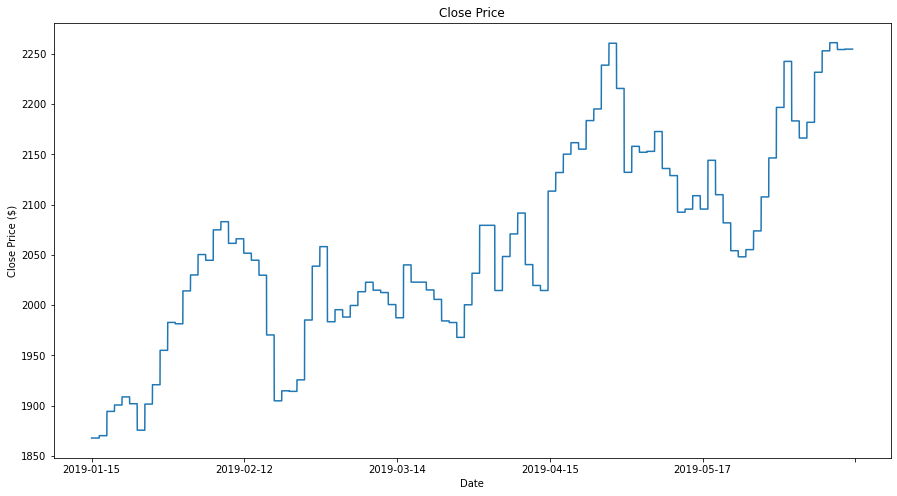

In [223]:
# defining figure size for plot
plt.figure(figsize=(15, 8))

# plotting 'close' price
stock_data['Close'].plot()

# defining title and labels of the plot
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.show()

In [224]:
# calculation the rolling mean for 7 days
stock_data.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume,word_count,char_count,sentiment,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
Date,,,,,,,,,,,,,,
2019-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-15,1810.0,1869.349976,1808.0,1867.800049,7711653.0,7.714286,49.428571,0.219481,0.479221,0.219481,0.212400,0.000000,0.836143,0.163857
2019-01-15,1810.0,1869.349976,1808.0,1867.800049,7711653.0,7.000000,45.571429,0.105195,0.336364,0.105195,0.098629,0.000000,0.908000,0.092000
2019-01-15,1810.0,1869.349976,1808.0,1867.800049,7711653.0,7.285714,48.285714,0.105195,0.336364,0.105195,0.046371,0.047857,0.860143,0.092000


In [225]:
stock_data.rolling(30).mean().head(50)

,Open,High,Low,Close,Volume,word_count,char_count,sentiment,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
Date,,,,,,,,,,,,,,
2019-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


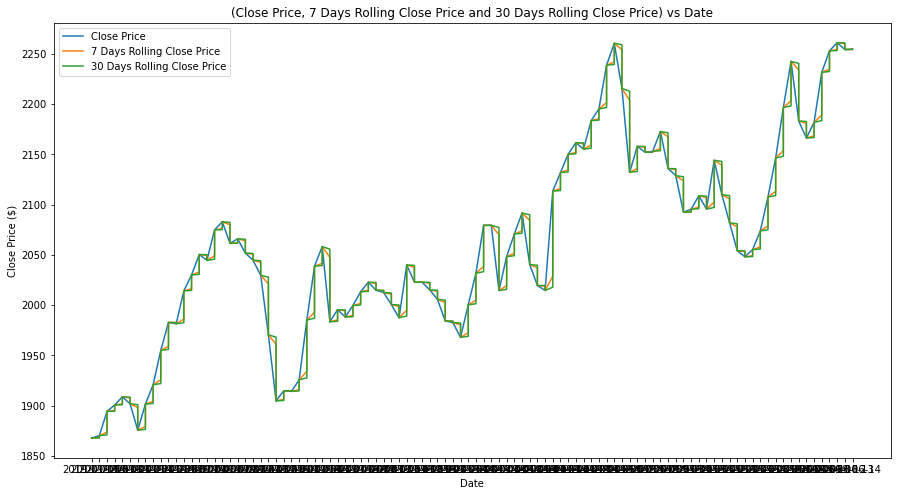

In [226]:
# defining figure size for plot
plt.figure(figsize=(15, 8))

#plotting the close price, a 7 days rolling mean and a 30 days rolling mean
Date=stock_data.index       
a=stock_data['Close']                              # for Close price
b=stock_data.rolling(window=7).mean()['Close']     # for 7 days rolling mean of Close price
c=stock_data.rolling(window=30).mean()['Close']    # for 30 days rolling mean of Close price

plt.plot(Date,a,Date,b,Date,c)

# defining title and labels of the plot
plt.title("(Close Price, 7 Days Rolling Close Price and 30 Days Rolling Close Price) vs Date")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend(["Close Price", "7 Days Rolling Close Price", "30 Days Rolling Close Price"])
plt.show()

# 6 Data Preparation for Creating Model

In [227]:
# calculating 'data_to_use'
percentage_of_data = 1.0

total_data= int(percentage_of_data*(len(stock_data)))

# using .9 of data for training and .1 for testing
train_end = int(total_data*0.9)
start = total_data - train_end

# printing number of records in the training and test datasets
print("Data records number:", total_data)
print("Training Data records number:", train_end)
print("Test Data Records number:", start)

Data records number: 49813
Training Data records number: 44831
Test Data Records number: 4982


In [228]:
# # filterning importent features
# stock_data = stock_data.drop(['word_count','char_count'],axis=1,inplace=True)


In [229]:
# rearanging all columns of 'stock_data'
stock_data = stock_data.filter(['Close','sentiment', 'Compound', 'Negative', 'Neutral', 'Positive','Subjectivity','Polarity','Open', 'High', 'Low', 'Volume'])

# # displaying the data
stock_data.head()

,Close,sentiment,Compound,Negative,Neutral,Positive,Subjectivity,Polarity,Open,High,Low,Volume
Date,,,,,,,,,,,,
2019-01-15,1867.800049,0.8,0.7964,0.0,0.497,0.503,1.0,0.8,1810.0,1869.349976,1808.0,7711653.0
2019-01-15,1867.800049,0.0,0.0000,0.0,1.000,0.000,0.0,0.0,1810.0,1869.349976,1808.0,7711653.0
2019-01-15,1867.800049,0.1,0.0000,0.0,1.000,0.000,1.0,0.1,1810.0,1869.349976,1808.0,7711653.0
2019-01-15,1867.800049,0.0,0.4404,0.0,0.756,0.244,0.0,0.0,1810.0,1869.349976,1808.0,7711653.0
2019-01-15,1867.800049,0.0,0.0000,0.0,1.000,0.000,0.0,0.0,1810.0,1869.349976,1808.0,7711653.0


In [230]:
# predicting the next step
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[:total_data,0]   #close
sentiment=stock_data.iloc[:total_data,1]      #sentiment
compound = stock_data.iloc[:total_data,2]      #compound
negative = stock_data.iloc[:total_data,3]      #negative
neutral = stock_data.iloc[:total_data,4]       #neutral
positive = stock_data.iloc[:total_data,5]      #positive
subjectivity = stock_data.iloc[:total_data,6]    #Subjectivity
polarity = stock_data.iloc[:total_data,7]          #Polarity
open_price = stock_data.iloc[:total_data,8]           #open_price
high = stock_data.iloc[:total_data,9]        #high_price
low = stock_data.iloc[:total_data,10]         #low_price
volume = stock_data.iloc[:total_data,11]       #volume_of stock

# printing close price
print("Close Price:")
close_price

Close Price:


Date
2019-01-15    1867.800049
2019-01-15    1867.800049
2019-01-15    1867.800049
2019-01-15    1867.800049
2019-01-15    1867.800049
                 ...     
2019-06-14    2254.500000
2019-06-14    2254.500000
2019-06-14    2254.500000
2019-06-14    2254.500000
2019-06-14    2254.500000
Name: Close, Length: 49813, dtype: float64

In [231]:
# shifting 'close' to next day close
close_price_shifted = close_price.shift(-1) 

# shifting the 'compound' to next day compound
compound_shifted = compound.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, volume, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'shifted_close_price', 'compound', 'shifted_compound','volume', 'open_price', 'high', 'low']

# dropping NULL values
data = data.dropna()    
data.head()

,close_price,shifted_close_price,compound,shifted_compound,volume,open_price,high,low
Date,,,,,,,,
2019-01-15,1867.800049,1867.800049,0.7964,0.0000,7711653.0,1810.0,1869.349976,1808.0
2019-01-15,1867.800049,1867.800049,0.0000,0.0000,7711653.0,1810.0,1869.349976,1808.0
2019-01-15,1867.800049,1867.800049,0.0000,0.4404,7711653.0,1810.0,1869.349976,1808.0
2019-01-15,1867.800049,1867.800049,0.4404,0.0000,7711653.0,1810.0,1869.349976,1808.0
2019-01-15,1867.800049,1867.800049,0.0000,0.2500,7711653.0,1810.0,1869.349976,1808.0


In [232]:
data.shape

(49812, 8)

# 7 Defining the Target Variable and Feature Dataset

In [233]:
# defining shifted_close_price as the target veriable
y = data['shifted_close_price']
y

Date
2019-01-15    1867.800049
2019-01-15    1867.800049
2019-01-15    1867.800049
2019-01-15    1867.800049
2019-01-15    1867.800049
                 ...     
2019-06-14    2254.500000
2019-06-14    2254.500000
2019-06-14    2254.500000
2019-06-14    2254.500000
2019-06-14    2254.500000
Name: shifted_close_price, Length: 49812, dtype: float64

In [234]:
# defining the features dataset for prediction  
cols = ['close_price', 'compound', 'shifted_compound', 'volume', 'open_price', 'high', 'low']
X = data[cols]
X

,close_price,compound,shifted_compound,volume,open_price,high,low
Date,,,,,,,
2019-01-15,1867.800049,0.7964,0.0000,7711653.0,1810.00,1869.349976,1808.0
2019-01-15,1867.800049,0.0000,0.0000,7711653.0,1810.00,1869.349976,1808.0
2019-01-15,1867.800049,0.0000,0.4404,7711653.0,1810.00,1869.349976,1808.0
2019-01-15,1867.800049,0.4404,0.0000,7711653.0,1810.00,1869.349976,1808.0
2019-01-15,1867.800049,0.0000,0.2500,7711653.0,1810.00,1869.349976,1808.0
...,...,...,...,...,...,...,...
2019-06-14,2254.500000,-0.3818,-0.2732,2131408.0,2257.25,2263.100098,2234.0
2019-06-14,2254.500000,-0.2732,-0.4404,2131408.0,2257.25,2263.100098,2234.0
2019-06-14,2254.500000,-0.4404,0.3182,2131408.0,2257.25,2263.100098,2234.0


In [235]:
'''# importing train_test_split for spliting the dataset into train and test data
from sklearn.model_selection import train_test_split

# preparing training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = None)'''

# preparing training and test dataset
X_train = X[: train_end]
X_test = X[train_end+1 : len(X)]    
y_train = y[: train_end] 
y_test = y[train_end+1: len(y)]

In [236]:
# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (44831, 7) and y: (44831,)
Number of rows and columns in the Test set X: (4980, 7) and y: (4980,)


In [237]:
# scaling the training features dataset
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
X_train = np.array(X_train).reshape((len(X_train) ,len(cols)))
X_train = scaler_x.fit_transform(X_train)
print(len(X_train))

# scaling the training target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y_train = np.array(y_train).reshape ((len( y_train), 1))
y_train = scaler_y.fit_transform (y_train)
print(len(y_train))

# scaling the test features dataset
X_test = np.array(X_test).reshape((len(X_test) ,len(cols)))
X_test= scaler_x.transform(X_test)
print(len(X_test))

# scaling the test target variable
y_test = np.array(y_test).reshape ((len(y_test), 1))
y_test = scaler_y.transform (y_test)
print(len(y_test))


# displaying the scaled  features dataset and the target variable
# X_train, X_test, y_train, y_test

44831
44831
4980
4980


7.3 Reshaping the Feature dataset

In [238]:
# reshaping the feature training dataset for feeding into the model
X_train = X_train.reshape(X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (44831, 7, 1)
Shape of Test set X: (4980, 7, 1)


# 8 Stock Data Modelling

In [239]:
# setting the seed to achieve consistent and less random predictions at each execution
#np.random.seed(2016)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout



# setting the model architecture
model=Sequential()
model.add(LSTM(32,return_sequences=True,activation="relu",input_shape=(len(cols),1)))
# model.add(leakyRelu(alpha=0.5))
model.add(Dropout(0.4))
model.add(LSTM(32,activation="relu",return_sequences=True))
# model.add(leakyRelu(alpha=0.5))
model.add(Dropout(0.4))
model.add(LSTM(32))
# model.add(leakyRelu(alpha=0.5))
model.add(Dropout(0.4))
model.add(Dense(1, activation = "sigmoid"))

# printing the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 7, 32)             4352      
_________________________________________________________________
dropout_18 (Dropout)         (None, 7, 32)             0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 7, 32)             8320      
_________________________________________________________________
dropout_19 (Dropout)         (None, 7, 32)             0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dropout_20 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [240]:
# model compilation
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

In [241]:
# fitting the model with using the training dataset
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',patience=3,mode='min')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size = 64, verbose = 1,callbacks=[early_stopping])

Epoch 1/10
701/701 [==============================] - 27s 34ms/step - loss: 0.1736 - accuracy: 0.0081 - val_loss: 0.0057 - val_accuracy: 0.0000e+00
Epoch 2/10
701/701 [==============================] - 23s 33ms/step - loss: 0.1419 - accuracy: 0.0111 - val_loss: 5.3636e-04 - val_accuracy: 0.0000e+00
Epoch 3/10
701/701 [==============================] - 24s 34ms/step - loss: 0.1412 - accuracy: 0.0111 - val_loss: 2.6996e-04 - val_accuracy: 0.0000e+00
Epoch 4/10
701/701 [==============================] - 23s 32ms/step - loss: 0.1410 - accuracy: 0.0111 - val_loss: 3.5103e-04 - val_accuracy: 0.0000e+00
Epoch 5/10
701/701 [==============================] - 24s 34ms/step - loss: 0.1408 - accuracy: 0.0111 - val_loss: 3.4950e-04 - val_accuracy: 0.0000e+00
Epoch 6/10
701/701 [==============================] - 23s 32ms/step - loss: 0.1408 - accuracy: 0.0111 - val_loss: 2.8600e-04 - val_accuracy: 0.0000e+00


8.1 Saving the model to the drive using pickle

In [242]:
# # importing pickle and dump the model to drive
# #dill extends pickle to include objects that are otherwise unpicklable with pickle. 
# #note that with dill, an unpickled weakref will deserialize as dead references.
# import pickle
# import dill
# with open('LSTM_model_microsoft_stock', 'wb') as files:
#     dill.dump(model, files)

# 9 Prediction and Model Evaluation

9.1 Prediction

In [243]:
# predictions on test data
predictions = model.predict(X_test)

# unscaling the predictions
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

# displaying the predicted values
print('Predictions:')
predictions[-10:-1]

Predictions:


array([[2256.3357],
       [2256.8708],
       [2256.8708],
       [2256.8708],
       [2256.2805],
       [2255.9412],
       [2255.839 ],
       [2256.6978],
       [2257.3904]], dtype=float32)

9.2 Model Evaluation

In [245]:
# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)
# printing the training mean-squared-errors
print('Train Loss =',train_loss)
 #round(train_loss,4)

44831/44831 [==============================] - 192s 4ms/step - loss: 0.1413 - accuracy: 0.0111
Train Loss = [0.14133556187152863, 0.01108607929199934]


In [246]:
# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)
# printing the test the mean-squared-errors
# print('Test Loss =', round(test_loss,4))
print('test_loss =',test_loss)

4980/4980 [==============================] - 21s 4ms/step - loss: 2.8601e-04 - accuracy: 0.0000e+00
test_loss = [0.0002860056411009282, 0.0]


In [247]:
# calculating root-mean-squared-error
root_mean_square_error = np.sqrt(np.mean(np.power((y_test - predictions),2)))
print('Root Mean Square Error =', round(root_mean_square_error,4))

Root Mean Square Error = 2222.176


In [248]:
# calculating root mean squared error using sklearn.metrics package
rmse = metrics.mean_squared_error(y_test, predictions)
print('Root Mean Square Error (sklearn.metrics) =', round(np.sqrt(rmse),4))

Root Mean Square Error (sklearn.metrics) = 2222.176


# 10 Plotting the Predictions

In [249]:
# unscaling the test feature dataset, x_test
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), X.shape[1])))

# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

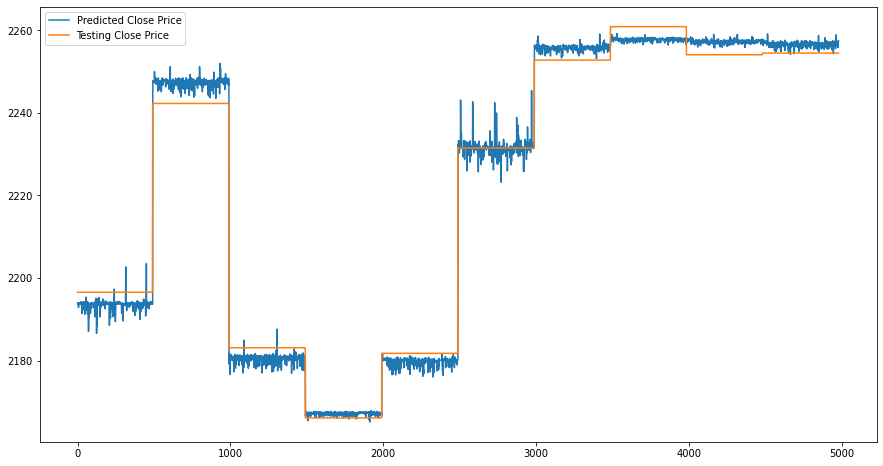

In [250]:
# plotting
plt.figure(figsize=(15,8))

plt.plot(predictions, label="Predicted Close Price")
plt.plot(y_test, label="Testing Close Price")
plt.legend(loc='best')
plt.show()